In [164]:
from google.colab import files
import pandas as pd
import io
uploaded=files.upload()
df = pd.read_csv(io.BytesIO(uploaded['wind dataset-2007.csv']),header=3)


Saving wind dataset-2007.csv to wind dataset-2007 (5).csv


In [165]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [166]:
series = df
series=series['wind_sp']
test = series[10000:11000]
series = series[:10000]
series_size = series.size
series = series.tolist()
test=test.tolist()

In [167]:
segment_size = 10
segments = []
no_of_clusters = 10
original_segment = []
for i in range(0,series_size,segment_size):
    no_of_up = 0
    sum_of_up = 0
    no_of_down = 0
    sum_of_down = 0
    no_of_equal = 0
    sum_of_equal = 0 
    temp = []
    temp.append(series[i])
    for j in range(i+1,i+10):
        temp.append(series[j])
        if(series[j]>series[j-1]):
            no_of_up = no_of_up +1
            sum_of_up = sum_of_up + series[j]
        elif(series[j]<series[j-1]):
            no_of_down = no_of_down +1
            sum_of_down = sum_of_down + series[j]
        else:
            no_of_equal = no_of_equal +1
            sum_of_equal = sum_of_equal + series[j]
    if(no_of_up==0):
        mean_of_up = 0
    else:
        mean_of_up = sum_of_up/no_of_up
    if(no_of_down==0):
        mean_of_down = 0
    else:
        mean_of_down = sum_of_down/no_of_down
    if(no_of_equal==0):
        mean_of_equal = 0
    else:
        mean_of_equal = sum_of_equal/no_of_equal
    segments.append([mean_of_up,mean_of_down,mean_of_equal])
    original_segment.append(temp)


In [168]:
print(len(segments))
X = np.array(segments)
kmeans = KMeans(n_clusters=no_of_clusters,init='k-means++', random_state=0).fit(X)
print(kmeans.labels_)

segment_label_map = {}
for i in range(0,no_of_clusters):
    segment_label_map[i] = []

for i in range(0,len(segments)):
    segment_label_map[kmeans.labels_[i]].append(i)
    
original_points_in_cluster = []
for i in range(0,no_of_clusters):
    temp = []
    for x in segment_label_map[i]:
        for y in original_segment[x]:
            temp.append(y)
    original_points_in_cluster.append(temp)

m=10000000
print(no_of_clusters)
for i in range(0,no_of_clusters):
    if(m>len(original_points_in_cluster[i])):        
        m=len(original_points_in_cluster[i])
print(m)
n=-m
clusters= [[0 for x in range(m)] for x in range(no_of_clusters)]
for i in range(0,no_of_clusters):
    clusters[i]=original_points_in_cluster[i][n:-1]

#for i in range(0,no_of_clusters):
 #   for x in clusters[i]:
  #     print(x,end=" ")
tar=series[n:-1]
maximum=0
for i in range(0,no_of_clusters):
    corr, _ = scipy.stats.pearsonr(clusters[i], tar) 
    if(maximum<corr):
        maximum=corr
        index=i

1000
[3 3 6 6 0 5 5 5 0 5 0 5 5 6 6 4 4 5 5 5 5 5 6 6 8 6 8 1 8 7 0 0 0 5 5 0 5
 6 5 6 8 8 8 1 8 8 8 1 1 8 8 9 7 8 1 7 8 8 8 8 8 8 1 7 7 7 4 8 4 8 8 1 8 8
 8 8 8 1 4 7 7 8 8 4 0 5 2 2 2 2 2 2 2 2 2 2 2 2 7 1 8 8 8 8 8 8 8 0 5 5 5
 5 5 5 5 5 5 4 0 5 5 5 4 5 3 3 5 3 3 3 3 3 3 3 3 5 5 5 5 5 5 6 4 8 1 4 1 7
 8 8 1 2 7 8 2 2 2 7 2 2 2 2 9 2 2 2 2 2 2 7 8 8 7 8 0 8 8 5 6 8 8 8 8 8 8
 1 1 1 1 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 7 2 2 2 2 2 2 2 2 9
 2 7 2 7 8 8 9 7 7 1 8 8 0 6 8 0 4 0 8 5 5 5 6 6 8 8 0 0 3 6 8 8 1 1 1 2 7
 8 1 2 1 2 2 2 9 2 7 7 8 8 2 0 5 8 8 5 5 6 1 1 9 8 2 2 2 7 2 8 7 8 8 7 4 4
 8 4 8 0 6 8 0 0 3 5 5 4 5 6 5 6 0 0 5 4 5 5 5 5 4 4 5 5 6 5 5 5 5 5 5 5 4
 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 6 5 5 0 0 3 3
 3 3 3 3 5 3 6 5 0 3 3 3 3 3 3 3 3 3 3 3 5 5 5 6 5 0 0 3 3 3 5 6 4 5 0 6 6
 5 5 5 8 8 8 8 8 1 8 8 8 1 8 8 1 7 8 1 8 7 7 4 4 0 8 8 8 4 8 0 8 0 5 0 5 5
 5 5 5 5 0 5 5 5 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 6 5 5 5 6 6 1 1 2 2 2 7 7 0
 1 1 7 7 8 8 8 2 7 8

In [169]:
selected_cluster=original_points_in_cluster[index]
train=selected_cluster
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(np.array(train).reshape(-1,1))
test_scaled=   scaler.fit_transform(np.array(test).reshape(-1,1))


In [170]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step)]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step])
	return np.array(dataX), np.array(dataY)


In [171]:
time_step = 100
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

In [172]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_test.shape

(899, 100, 1)

In [173]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])


In [174]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
20/20 [==============================] - 2s 121ms/step - loss: 0.0700 - accuracy: 0.0016
Epoch 2/20
20/20 [==============================] - 3s 127ms/step - loss: 0.0333 - accuracy: 0.0016
Epoch 3/20
20/20 [==============================] - 2s 124ms/step - loss: 0.0298 - accuracy: 0.0033
Epoch 4/20
20/20 [==============================] - 2s 124ms/step - loss: 0.0272 - accuracy: 0.0033
Epoch 5/20
20/20 [==============================] - 2s 122ms/step - loss: 0.0249 - accuracy: 0.0033
Epoch 6/20
20/20 [==============================] - 2s 121ms/step - loss: 0.0239 - accuracy: 0.0033
Epoch 7/20
20/20 [==============================] - 2s 120ms/step - loss: 0.0216 - accuracy: 0.0033
Epoch 8/20
20/20 [==============================] - 2s 121ms/step - loss: 0.0211 - accuracy: 0.0033
Epoch 9/20
20/20 [==============================] - 2s 121ms/step - loss: 0.0190 - accuracy: 0.0033
Epoch 10/20
20/20 [==============================] - 2s 120ms/step - loss: 0.0189 - accuracy: 0.0016

In [175]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
y_train=scaler.inverse_transform(y_train)
y_test=scaler.inverse_transform(y_test)

In [176]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))
math.sqrt(mean_squared_error(y_test,test_predict))

2.0792547402557227

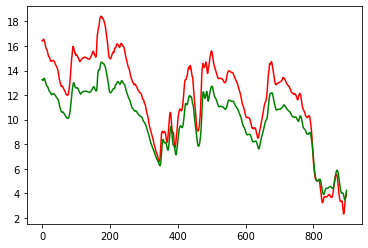

In [177]:
### Plotting 
# shift train predictions for plotting
t = np.linspace(0,900)
plt.plot(y_test,color='red')
plt.plot(test_predict,color='green')
plt.show()